            Kariz          MRD           CP    infinite      NoCache
Query                                                               
Q1     285.666667   524.000000   520.666667  203.333333   518.333333
Q10    327.000000   423.666667   328.000000         NaN   459.000000
Q11    120.000000   131.000000   131.000000         NaN   139.333333
Q14    723.000000   723.000000   756.000000         NaN   858.000000
Q15    689.000000   766.000000   766.000000         NaN   775.000000
Q19    917.000000   917.000000   969.000000         NaN  1041.000000
Q2     419.333333   436.666667   428.666667  434.666667   483.000000
Q20    649.000000   908.000000   856.000000         NaN  1116.000000
Q21    595.000000  1071.000000  1025.000000         NaN  1098.000000
Q22    289.000000   570.000000   529.000000         NaN   788.000000
Q3     802.500000  1031.500000  1032.000000  701.750000  1142.500000
Q4     831.000000   940.666667   971.000000  776.000000  1188.000000
Q7     220.000000   268.333333   2

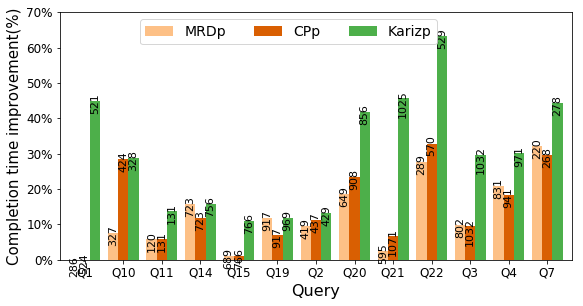

In [18]:
#!/usr/bin/python
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

def format_yticks(y, pos=None):
    return str(int(y*100)) + '%'

colors=['#fdc086', '#d95f02', '#4daf4a']
df1 = pd.read_csv('./implementationresults.csv')

df = df1.groupby("Query").agg({'Kariz': 'mean', 'MRD': 'mean', 
                               'CP': 'mean', 'infinite': 'mean', 'NoCache': 'mean'})

print(df)

#df1.set_index('Query', inplace=True)

#df['KARIZvsMRD'] = 1 - df['Kariz']/df['MRD']
#df['KARIZvsCP'] = 1 - df['Kariz']/df['CP']
df['Karizp'] = 1 - df['Kariz']/df['NoCache']
df['CPp'] = 1 - df['CP']/df['NoCache']
df['MRDp'] = 1 - df['MRD']/df['NoCache']


#print(df['KARIZvsMRD'].mean(), df['KARIZvsMRD'].max(), df['KARIZvsMRD'].min())
#print(df['KARIZvsCP'].mean(), df['KARIZvsCP'].max(), df['KARIZvsCP'].min())
#print(df['Kariz'].mean(), df['Kariz'].max(), df['Kariz'].min())

print(df[['Kariz', 'CP', 'MRD']])

fig, ax = plt.subplots(figsize=(8, 4))
plt.ylabel('Completion time improvement(%)', fontsize=15)
plt.xlabel('TPCH Query', fontsize=16)
df[['MRDp', 'CPp', 'Karizp']].plot.bar(rot=0, ax=ax, width=0.8
                                                , color=colors)

for idx, i in enumerate(ax.patches):
    ax.text(i.get_x(), i.get_height(), int(round(df.iloc[idx%len(df),idx//len(df)],0)), fontsize =11, 
            rotation = 90)
    print()

ax.tick_params(axis='both', which='major', labelsize=12)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_yticks))
plt.legend(ncol=5, bbox_to_anchor=(0.25, 0.65, 0.5, 0.35), fontsize=14)
plt.ylim(0, 0.7)
plt.grid(False)
plt.subplots_adjust(left=0.1, bottom=0.13, right=0.99, top=0.99)
#fig.savefig('../fig_runtimeimplementation.pdf', format='pdf', dpi=200)
#fig.savefig('../fig_runtimeimplementation.png', format='png', dpi=200)
plt.show()
